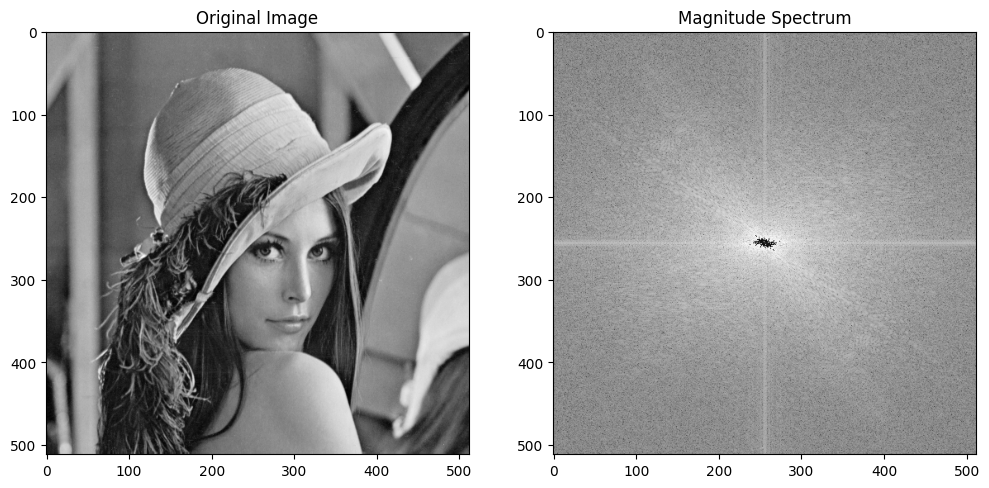

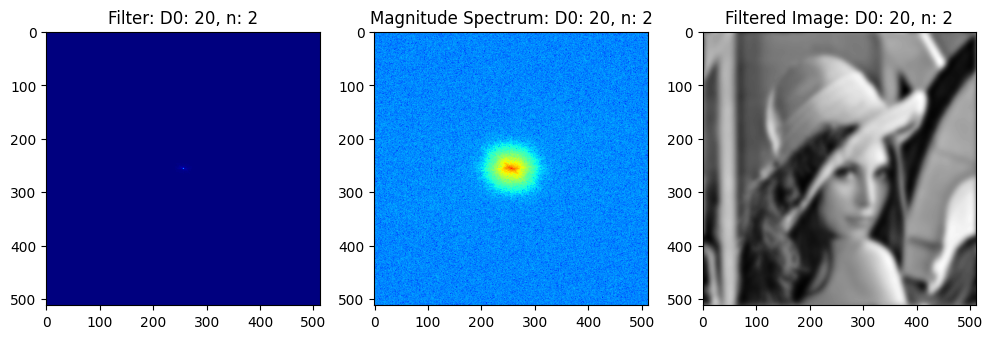

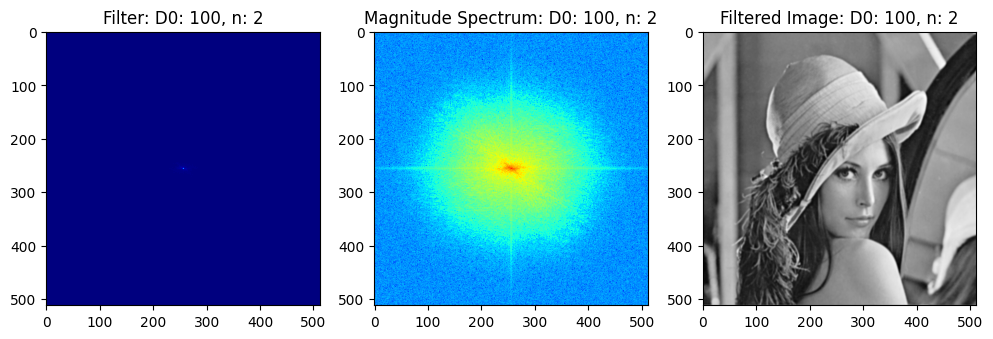

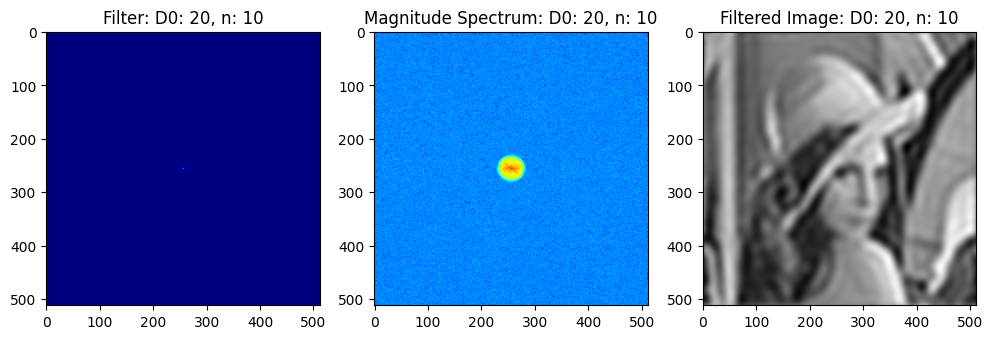

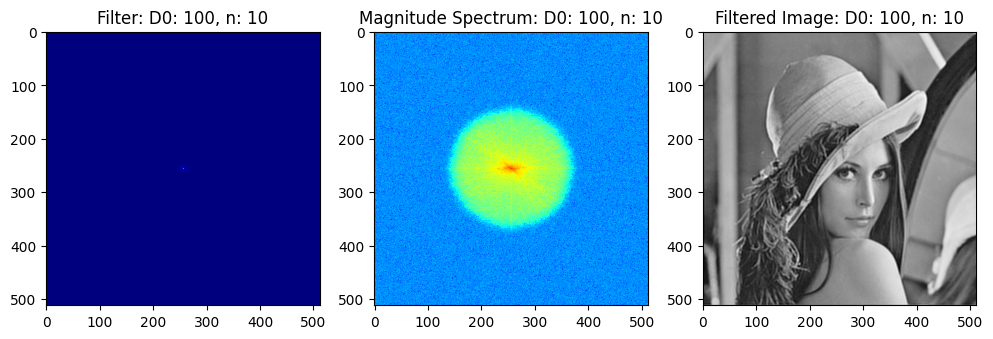

In [43]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

# Load the Lenna image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)


def butterworthLowpassFilter(img, D0, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape[:2]
    crow, ccol = rows/2, cols/2
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    
    H = 1 / (1 + (D/D0)**(2*n))
    
    G = fshift * H
    
    g = np.fft.ifft2(np.fft.ifftshift(G)).real
    
    return g.astype(np.uint8)

def butterworthHighpassFilter(img, D0, n):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape[:2]
    crow, ccol = rows/2, cols/2
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    
    H = 1 - 1 / (1 + (D/D0)**(2*n))
    
    G = fshift * H
    
    g = np.fft.ifft2(np.fft.ifftshift(G)).real
    
    return g.astype(np.uint8)


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))




fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(magnitude_spectrum.astype(np.uint8), cmap='gray')
axs[1].set_title('Magnitude Spectrum')

ns = [2, 10]
D0s = [20, 100]

for n in ns:
    for D0 in D0s:
        filtered_img = butterworthLowpassFilter(img, D0, n)

        f = np.fft.fft2(filtered_img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = np.abs(fshift)



        fig, axs = plt.subplots(1, 3, figsize=(12, 6))


        axs[0].imshow(magnitude_spectrum, cmap='jet')
        axs[0].set_title('Filter: D0: {}, n: {}'.format(D0, n))

        axs[1].imshow(np.log(1 + magnitude_spectrum), cmap='jet')
        axs[1].set_title('Magnitude Spectrum: D0: {}, n: {}'.format(D0, n))

        axs[2].imshow(filtered_img, cmap='gray')
        axs[2].set_title('Filtered Image: D0: {}, n: {}'.format(D0, n))



        





